In [1]:
%matplotlib inline

from scipy import signal
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches
import os.path as path
import numpy as np
outdir = '/home/eric/Phd_thesis/figures/'
# # # Using seaborn's style
# # plt.style.use('seaborn')

# # width = 345

# nice_fonts = {
#         # Use LaTeX to write all text
#         "text.usetex": True,
#         "font.family": "serif",
#         # Use 10pt font in plots, to match 10pt font in document
#         "axes.labelsize": 10,
#         "font.size": 10,
#         # Make the legend/label fonts a little smaller
#         "legend.fontsize": 8,
#         "xtick.labelsize": 8,
#         "ytick.labelsize": 8,
# }

# mpl.rcParams.update(nice_fonts)
# print("Your style sheets are located at: {}".format(path.join(mpl.__path__[0], 'mpl-data', 'stylelib')))
from my_plot import set_size
from matplotlib import cm
width_pt = 506.45#'thesis'# 
plt.style.use('tex')
output_dir = '/home/eric/Phd_thesis/figures/'

99.95930252922952


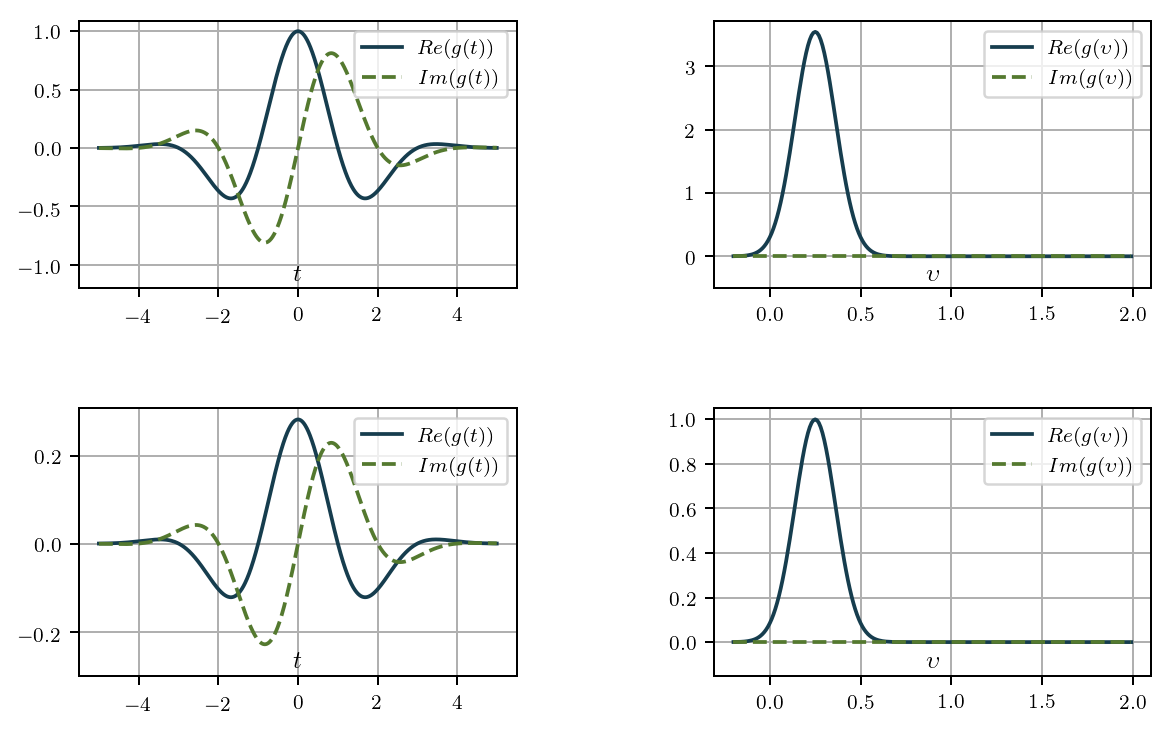

In [2]:
t = np.arange(-5, 5, 0.01)
u = np.arange(-0.2, 2, 0.01)
f = 1/4. 
t_0 = 0.
alpha = 0.5

norm_const = np.sqrt(alpha**2/np.pi)

gauss_t = np.exp(- alpha**2 * (t-t_0) **2)
gt = gauss_t * np.exp(1j* 2 *np.pi * f * t)

gauss_f = np.exp(- (np.pi/alpha)**2 * (u-f)**2)
gf = gauss_f #* np.exp(-1j* 2*np.pi * (u-f) * t_0)
gf *= np.sqrt(np.pi/alpha**2)


gt_norm = gt * norm_const
gf_norm = gf * norm_const

print np.abs(gt_norm).sum()
fig, ax = plt.subplots(2, 2, figsize=set_size(width_pt, subplots=(2, 2)), dpi=180)
        
ax[0, 0].plot(t, gt.real, c=plt.cm.cubehelix(0.2))
ax[0, 0].plot(t, gt.imag, '--', c=plt.cm.cubehelix(0.4))
ax[0, 0].grid()
ax[0, 0].legend((r'$Re(g(t))$', r'$Im(g(t))$'), loc='upper right')
ax[0, 0].set_ylim(-1.2, )
ax[0, 0].set_xlabel(r'$t$', labelpad=-25)

ax[0, 1].plot(u, gf.real, c=plt.cm.cubehelix(0.2))
ax[0, 1].plot(u, gf.imag, '--', c=plt.cm.cubehelix(0.4))
ax[0, 1].grid()
ax[0, 1].legend((r'$Re(g(\upsilon))$', r'$Im(g(\upsilon))$'), loc='upper right')
ax[0, 1].set_ylim(-0.5, )
ax[0, 1].set_xlabel(r'$\upsilon$', labelpad=-25)

ax[1, 0].plot(t, gt_norm.real, c=plt.cm.cubehelix(0.2))
ax[1, 0].plot(t, gt_norm.imag, '--', c=plt.cm.cubehelix(0.4))
ax[1, 0].grid()
ax[1, 0].legend((r'$Re(g(t))$', r'$Im(g(t))$'), loc='upper right')
ax[1, 0].set_ylim(-0.3, )
ax[1, 0].set_xlabel(r'$t$', labelpad=-25)

ax[1, 1].plot(u, gf_norm.real, c=plt.cm.cubehelix(0.2))
ax[1, 1].plot(u, gf_norm.imag, '--', c=plt.cm.cubehelix(0.4))
ax[1, 1].grid()
ax[1, 1].legend((r'$Re(g(\upsilon))$', r'$Im(g(\upsilon))$'), loc='upper right')
ax[1, 1].set_ylim(-0.15, )
ax[1, 1].set_xlabel(r'$\upsilon$', labelpad=-25)
    
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)

plt.savefig('GaborFilter_timefreq_1d_norm_efect.pdf', format='pdf', bbox_inches='tight')
# plt.savefig(outdir + 'GaborFilter_timefreq_1d_norm_efect.pdf', format='pdf', bbox_inches='tight')


52.04998045811607 0.999938316874976
52.04998045811607 0.9997532903278111
52.04998045811607 1.0
52.04998045811607 1.0
52.04998045811607 1.0


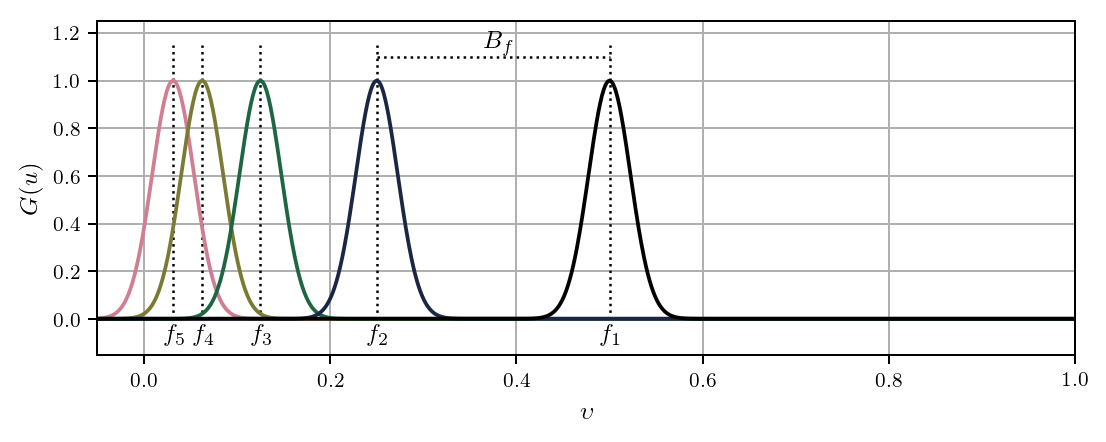

In [3]:
t = np.arange(-5, 5, 0.01)
u = np.arange(-1, 1, 0.001)

bandwidth = 1
k = 2 ** bandwidth
c1 = 0.2
gamma = (1/np.pi) * np.sqrt(np.log(1/c1)) * ((k+1)/(k-1))
f_high = 1/2.
f_low = 1/33.
           
frequencies = np.array([k**-ii * f_high for ii in range(20)], dtype=np.float)
frequencies = frequencies[f_low < frequencies][::-1]

c_vals = np.linspace(0, 0.6, len(frequencies)) 
colors = [cm.cubehelix(x) for x in c_vals][::-1]

plt.figure(figsize=set_size(width=width_pt, fraction=1., ratio=0.35), dpi=180)
# plt.plot(u, np.ones(len(u))*c1, color='k', linestyle='--', lw=1)
# plt.legend(('$c_1$',))
for ii, f in enumerate(frequencies):
    alpha = 0.1#f/gamma
    norm_const = np.sqrt(alpha**2/np.pi)

    gauss_t = np.exp(- alpha**2 * (t-t_0) **2)
    gt = gauss_t * np.exp(1j* 2 *np.pi * f * t)

    gauss_f = np.exp(- (np.pi/alpha)**2 * (u-f)**2)
    gf = gauss_f #* np.exp(-1j* 2*np.pi * (u-f) * t_0)
    gf *= np.sqrt(np.pi/alpha**2)

    gt_norm = gt * norm_const
    gf_norm = gf * norm_const
    
    plt.vlines(f, 0, 1.15, color='k', linestyle=':', lw=1)
    plt.text((f-0.01), -0.11, r'$f_%d$'%(len(frequencies)-ii), rotation=0)
#     plt.legend(('$c_1$',))
    
    print np.abs(gt_norm).sum(), np.abs(gf_norm).max()
    plt.plot(u, gf_norm.real, c=colors[ii])
    
plt.hlines(1.1, frequencies[-2], frequencies[-1], color='k', linestyle=':', label=r'$f$', lw=1)
plt.text((frequencies[-2]+((frequencies[-1]-frequencies[-2])/2.))-0.01, 1.12, r'$B_f$', rotation=0)

plt.grid()
plt.xlabel(r'$\upsilon$')
plt.ylabel(r'$G(u)$')
plt.xlim(-0.05, 1)
plt.ylim(-0.15, 1.25)

plt.savefig('GaborFilterbank_freq_1d_octave_spacing.pdf', format='pdf', bbox_inches='tight')
# plt.savefig(outdir + 'GaborFilterbank_freq_1d_octave_spacing.pdf', format='pdf', bbox_inches='tight')


21.894150721732476 0.999600826914781
42.170694530947415 0.999600826914781
73.37582923190459 0.9999999999999999
97.38189479649844 0.9999999999999999
99.9991292590424 0.9999999999999999


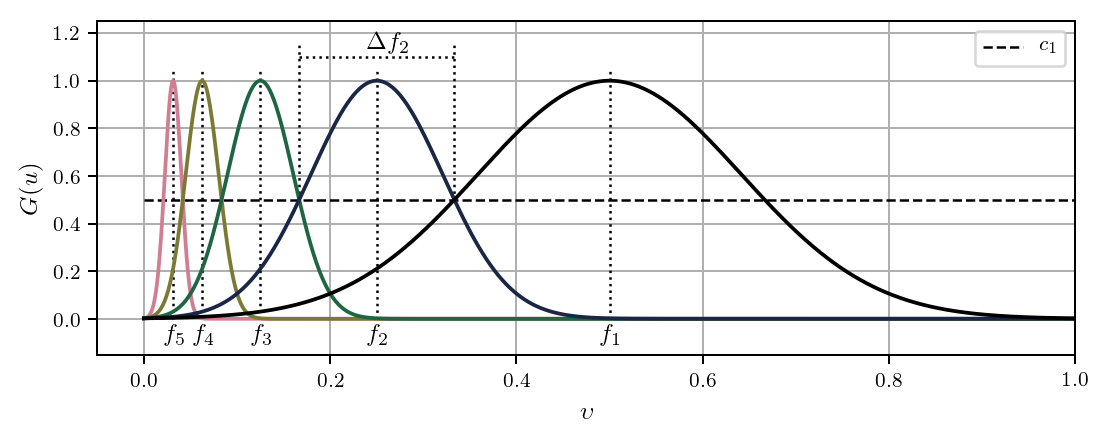

In [5]:
t = np.arange(-5, 5, 0.01)
u = np.arange(0, 1, 0.001)

bandwidth = 1.
k = 2 ** bandwidth
c1 = 0.5
gamma = (1/np.pi) * np.sqrt(np.log(1/c1)) * ((k+1)/(k-1))
f_high = 1/2.
f_low = 1/33.
           
frequencies = np.array([k**-ii * f_high for ii in range(20)], dtype=np.float)
frequencies = frequencies[f_low < frequencies][::-1]

central_freq = frequencies[-2]
delta_f = central_freq * ((k-1)/(k+1))
freq_pos = central_freq + delta_f 
freq_neg = central_freq - delta_f 

c_vals = np.linspace(0, 0.6, len(frequencies)) 
colors = [cm.cubehelix(x) for x in c_vals][::-1]

plt.figure(figsize=set_size(width=width_pt, fraction=1., ratio=0.35), dpi=180)
plt.plot(u, np.ones(len(u))*c1, color='k', linestyle='--', lw=1)
plt.legend(('$c_1$',))
for ii, f in enumerate(frequencies):
    alpha = f/gamma
    norm_const = np.sqrt(alpha**2/np.pi)

    gauss_t = np.exp(- alpha**2 * (t-t_0) **2)
    gt = gauss_t * np.exp(1j* 2 *np.pi * f * t)

    gauss_f = np.exp(- (np.pi/alpha)**2 * (u-f)**2)
    gf = gauss_f #* np.exp(-1j* 2*np.pi * (u-f) * t_0)
    gf *= np.sqrt(np.pi/alpha**2)

    gt_norm = gt * norm_const
    gf_norm = gf * norm_const
    
    print np.abs(gt_norm).sum(), np.abs(gf_norm).max()
    
    plt.vlines(f, 0, 1.05, color='k', linestyle=':', lw=1)
    plt.text((f-0.01), -0.11, r'$f_%d$'%(len(frequencies)-ii), rotation=0)
    plt.plot(u, gf_norm.real, c=colors[ii])

plt.text((central_freq)-0.01, 1.12, r'$\Delta f_2$', rotation=0)
plt.hlines(1.1, freq_neg, freq_pos, color='k', linestyle=':', label=r'$f$', lw=1)
plt.vlines(freq_pos, c1, 1.15, color='k', linestyle=':', lw=1)
plt.vlines(freq_neg, c1, 1.15, color='k', linestyle=':', lw=1)

plt.grid()
plt.xlabel(r'$\upsilon$')
plt.ylabel(r'$G(u)$')
plt.xlim(-0.05, 1)
plt.ylim(-0.15, 1.25)

plt.savefig('GaborFilterbank_freq_1d_half_crossingpoint.pdf', format='pdf', bbox_inches='tight')
# plt.savefig(outdir + 'GaborFilterbank_freq_1d_half_crossingpoint.pdf', format='pdf', bbox_inches='tight')



52.40883074282217 0.99993931418444
84.60699274073178 0.9999393141844398
99.5649562206865 0.9999999999999999
99.99999882343147 0.9999999999999999
100.00000000000212 0.9999999999999999


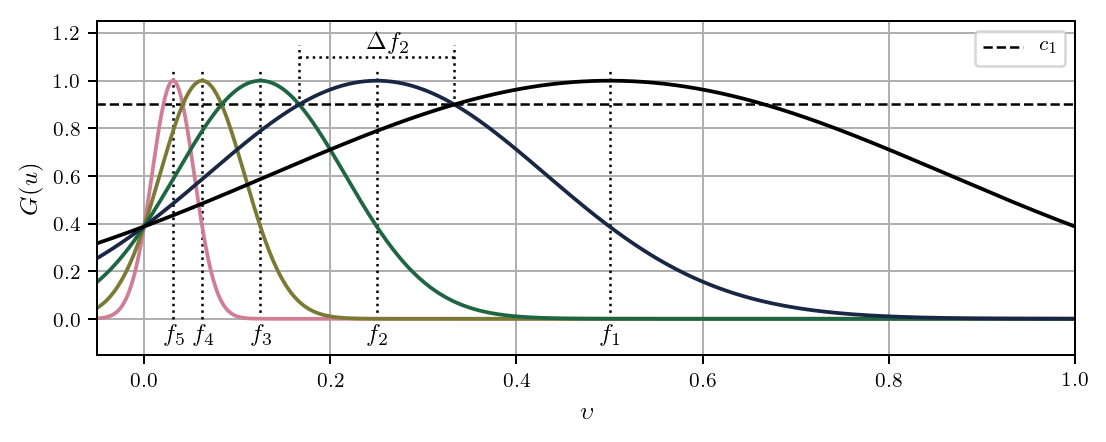

In [6]:
t = np.arange(-5, 5, 0.01)
u = np.arange(-1, 1, 0.001)

bandwidth = 1.
k = 2 ** bandwidth
c1 = 0.9
gamma = (1/np.pi) * np.sqrt(np.log(1/c1)) * ((k+1)/(k-1))
f_high = 1/2.
f_low = 1/33.
           
frequencies = np.array([k**-ii * f_high for ii in range(20)], dtype=np.float)
frequencies = frequencies[f_low < frequencies][::-1]

central_freq = frequencies[-2]
delta_f = central_freq * ((k-1)/(k+1))
freq_pos = central_freq + delta_f 
freq_neg = central_freq - delta_f 

c_vals = np.linspace(0, 0.6, len(frequencies)) 
colors = [cm.cubehelix(x) for x in c_vals][::-1]

plt.figure(figsize=set_size(width=width_pt, fraction=1., ratio=0.35), dpi=180)
plt.plot(u, np.ones(len(u))*c1, color='k', linestyle='--', lw=1)
plt.legend(('$c_1$',))
for ii, f in enumerate(frequencies):
    alpha = f/gamma
    norm_const = np.sqrt(alpha**2/np.pi)

    gauss_t = np.exp(- alpha**2 * (t-t_0) **2)
    gt = gauss_t * np.exp(1j* 2 *np.pi * f * t)

    gauss_f = np.exp(- (np.pi/alpha)**2 * (u-f)**2)
    gf = gauss_f #* np.exp(-1j* 2*np.pi * (u-f) * t_0)
    gf *= np.sqrt(np.pi/alpha**2)

    gt_norm = gt * norm_const
    gf_norm = gf * norm_const
    
    print np.abs(gt_norm).sum(), np.abs(gf_norm).max()
    
    plt.vlines(f, 0, 1.05, color='k', linestyle=':', label=r'$f$', lw=1)
    plt.text((f-0.01), -0.11, r'$f_%d$'%(len(frequencies)-ii), rotation=0)
    
    plt.plot(u, gf_norm.real, c=colors[ii])

plt.text((central_freq)-0.01, 1.12, r'$\Delta f_2$', rotation=0)
plt.hlines(1.1, freq_neg, freq_pos, color='k', linestyle=':', label=r'$f$', lw=1)
plt.vlines(freq_pos, c1, 1.15, color='k', linestyle=':', lw=1)
plt.vlines(freq_neg, c1, 1.15, color='k', linestyle=':', lw=1)

plt.grid()
plt.xlabel(r'$\upsilon$')
plt.ylabel(r'$G(u)$')
plt.xlim(-0.05, 1)
plt.ylim(-0.15, 1.25)

plt.savefig('GaborFilterbank_freq_1d_new_crossingpoint.pdf', format='pdf', bbox_inches='tight')
# plt.savefig(outdir + 'GaborFilterbank_freq_1d_new_crossingpoint.pdf', format='pdf', bbox_inches='tight')

(-0.15, 0.55)

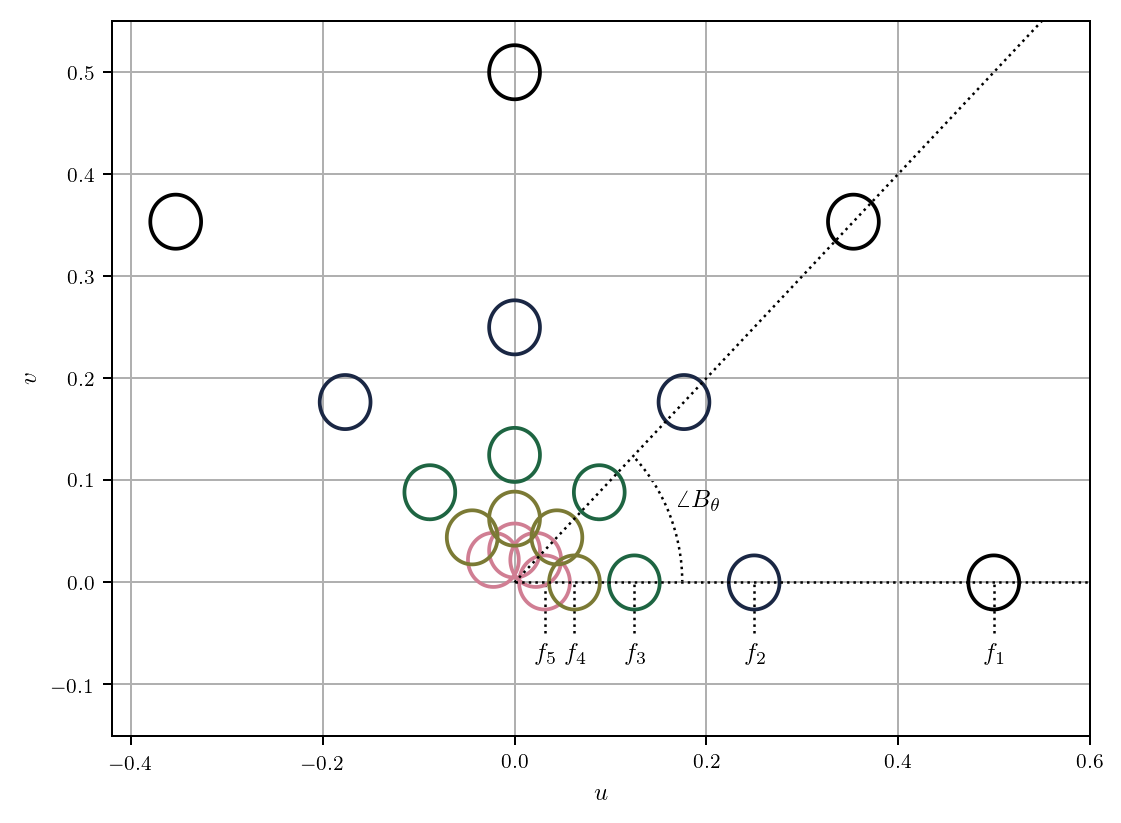

In [15]:
# Generating Gabor filterbank in spatial-frequency domain
min_period = 2.
max_period = 35.

bf = 1
ba = np.deg2rad(45)

c1 = 0.5
c2 = 0.5 

k = 2 ** bf
f_high = 1/(min_period)
f_low = 1/(max_period)

gamma = (1/np.pi) * np.sqrt(np.log(1/c1)) * ((k+1)/(k-1))
eta = (1/np.pi) * np.sqrt(np.log(1/c2)) * (1/np.tan(ba/2.))

n = np.int(np.round(np.sqrt((eta * np.pi **2)**2 / (4 * np.log(1/c2)))))

frequencies = np.array([k**-ii * f_high for ii in range(20)], dtype=np.float)
angles = [aa * (np.pi/int(n)) for aa in range(n)]
frequencies = frequencies[f_low < frequencies][::-1]

# [x, y] = np.meshgrid(range(-envelope[0], envelope[0] + 1), range(-envelope[1], envelope[1] + 1))
x0 = y0 = 20
u0 = v0 = 0.6

[x, y] = np.meshgrid(np.arange(-x0, x0, 0.1), np.arange(-y0, y0, 0.1))
[u, v] = np.meshgrid(np.arange(-0.42, u0, 0.001), np.arange(-0.15, 0.55, 0.001))

fig = plt.figure(figsize=set_size(width=width_pt, fraction=1, ratio=0.75), dpi=180)
ax = fig.add_subplot(1, 1, 1)

c_vals = np.linspace(0, 0.6, len(frequencies)) 
colors = [cm.cubehelix(x) for x in c_vals][::-1]

central_freq = frequencies[-1]
u1 = 2* np.pi * central_freq * np.cos(0)
v1 = 2* np.pi * central_freq * np.sin(0)
u1_values = [0, u1]
v1_values = [0, v1]

u2 = 2* np.pi * central_freq * np.cos(ba)
v2 = 2* np.pi * central_freq * np.sin(ba)
u2_values = [0, u2]
v2_values = [0, v2]



for ii, f in enumerate(frequencies):
    plt.vlines(f, -0.05, 0, color='k', linestyle=':', lw=1)
    plt.text((f-0.01), -0.08, r'$f_%d$'%(len(frequencies)-ii), rotation=0)
    
    for jj, theta in enumerate(angles):
        
        # Rotation of axes in terms if the angle
        xr = x * np.cos(theta) + y * np.sin(theta)
        yr = -x * np.sin(theta) + y * np.cos(theta)

        ur = u * np.cos(theta) + v * np.sin(theta)
        vr = -u * np.sin(theta) + v * np.cos(theta)
        
        alpha = 0.1 #f/gamma #
        beta = 0.1 #f/eta #
        
        norm_const = (alpha*beta)/np.pi

        gauss_s = np.exp(- (alpha**2 * xr **2 + beta**2 * yr **2))
        gs = gauss_s * np.exp(1j* 2 *np.pi * f * xr)

        gauss_sf = np.exp(- np.pi**2 * (((ur-f)**2/alpha**2) + (vr**2/beta**2)))
        gsf = gauss_sf #* np.exp(-1j* 2*np.pi * (u-f) * t_0)
        gsf *= np.pi/(alpha*beta)

        gs_norm = gs * norm_const
        gsf_norm = gsf * norm_const
        

        
#         print gsf_norm.shape
#         print gsf_norm > 0
        plt.contour(u, v, gsf_norm, levels=[0.5], colors=[colors[ii]])

e1 = patches.Arc((0, 0), 0.35, 0.35, theta1=0, theta2=45, linestyle=':', lw=1)
ax.add_patch(e1)

plt.plot(u1_values, v1_values, color='k', linestyle=':', lw=1)
plt.plot(u2_values, v2_values, color='k', linestyle=':', lw=1)
plt.text(0.17, 0.07, r'$\angle B_\theta$', rotation=0)

plt.grid()
plt.xlabel(r'$u$')
plt.ylabel(r'$v$')
plt.xlim(-0.42, 0.6)
plt.ylim(-0.15, 0.55)

(-0.15, 0.55)

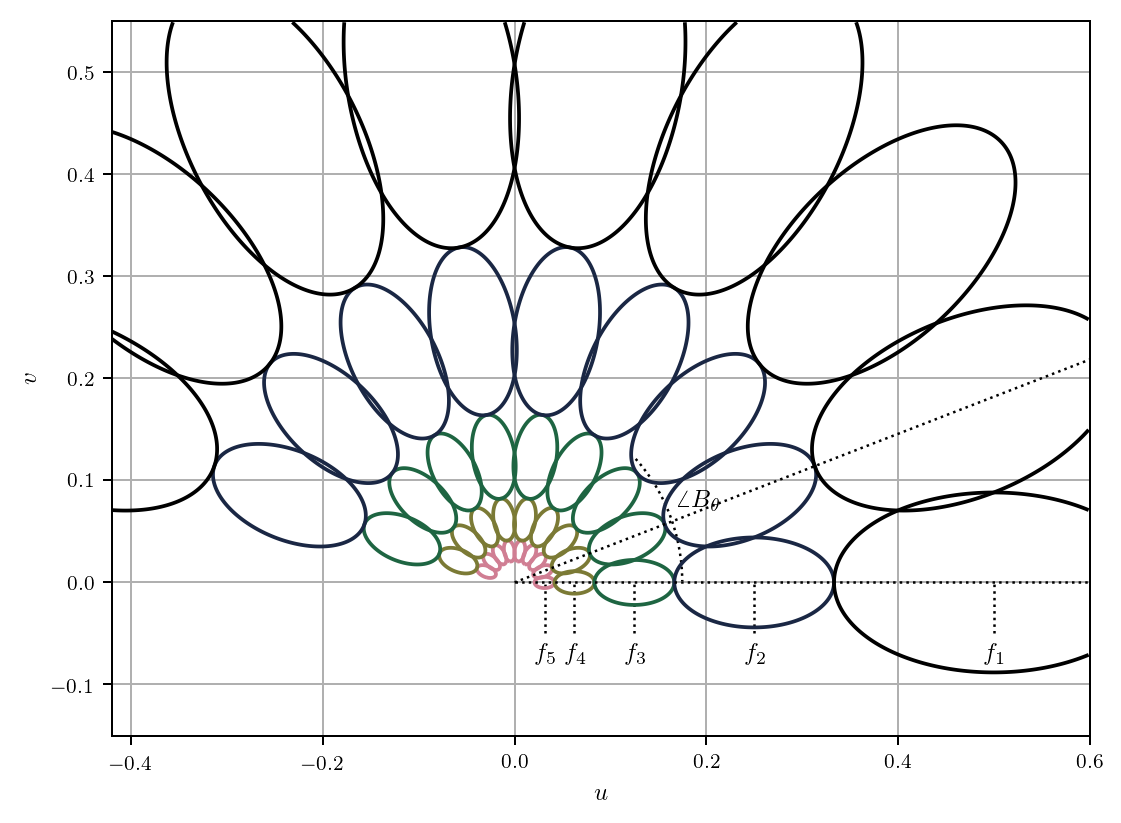

In [7]:
# Generating Gabor filterbank in spatial-frequency domain
min_period = 2.
max_period = 35.

bf = 1
ba = np.deg2rad(20)

c1 = 0.5
c2 = 0.5 

k = 2 ** bf
f_high = 1/(min_period)
f_low = 1/(max_period)

gamma = (1/np.pi) * np.sqrt(np.log(1/c1)) * ((k+1)/(k-1))
eta = (1/np.pi) * np.sqrt(np.log(1/c2)) * (1/np.tan(ba/2.))

n = np.int(np.round(np.sqrt((eta * np.pi **2)**2 / (4 * np.log(1/c2)))))

frequencies = np.array([k**-ii * f_high for ii in range(20)], dtype=np.float)
angles = [aa * (np.pi/int(n)) for aa in range(n)]
frequencies = frequencies[f_low < frequencies][::-1]

# [x, y] = np.meshgrid(range(-envelope[0], envelope[0] + 1), range(-envelope[1], envelope[1] + 1))
x0 = y0 = 20
u0 = v0 = 0.6

[x, y] = np.meshgrid(np.arange(-x0, x0, 0.1), np.arange(-y0, y0, 0.1))
[u, v] = np.meshgrid(np.arange(-0.42, u0, 0.001), np.arange(-0.15, 0.55, 0.001))

fig = plt.figure(figsize=set_size(width=width_pt, fraction=1, ratio=0.75), dpi=180)
ax = fig.add_subplot(1, 1, 1)

c_vals = np.linspace(0, 0.6, len(frequencies)) 
colors = [cm.cubehelix(x) for x in c_vals][::-1]

central_freq = frequencies[-1]
u1 = 2* np.pi * central_freq * np.cos(0)
v1 = 2* np.pi * central_freq * np.sin(0)
u1_values = [0, u1]
v1_values = [0, v1]

u2 = 2* np.pi * central_freq * np.cos(ba)
v2 = 2* np.pi * central_freq * np.sin(ba)
u2_values = [0, u2]
v2_values = [0, v2]



for ii, f in enumerate(frequencies):
    plt.vlines(f, -0.05, 0, color='k', linestyle=':', lw=1)
    plt.text((f-0.01), -0.08, r'$f_%d$'%(len(frequencies)-ii), rotation=0)
    
    for jj, theta in enumerate(angles):
        
        # Rotation of axes in terms if the angle
        xr = x * np.cos(theta) + y * np.sin(theta)
        yr = -x * np.sin(theta) + y * np.cos(theta)

        ur = u * np.cos(theta) + v * np.sin(theta)
        vr = -u * np.sin(theta) + v * np.cos(theta)
        
        alpha = f/gamma #0.1 #
        beta = f/eta #0.1 #
        
        norm_const = (alpha*beta)/np.pi

        gauss_s = np.exp(- (alpha**2 * xr **2 + beta**2 * yr **2))
        gs = gauss_s * np.exp(1j* 2 *np.pi * f * xr)

        gauss_sf = np.exp(- np.pi**2 * (((ur-f)**2/alpha**2) + (vr**2/beta**2)))
        gsf = gauss_sf #* np.exp(-1j* 2*np.pi * (u-f) * t_0)
        gsf *= np.pi/(alpha*beta)

        gs_norm = gs * norm_const
        gsf_norm = gsf * norm_const
        

        
#         print gsf_norm.shape
#         print gsf_norm > 0
        plt.contour(u, v, gsf_norm, levels=[c1], colors=[colors[ii]])

e1 = patches.Arc((0, 0), 0.35, 0.35, theta1=0, theta2=45, linestyle=':', lw=1)
ax.add_patch(e1)

plt.plot(u1_values, v1_values, color='k', linestyle=':', lw=1)
plt.plot(u2_values, v2_values, color='k', linestyle=':', lw=1)
plt.text(0.17, 0.07, r'$\angle B_\theta$', rotation=0)

plt.grid()
plt.xlabel(r'$u$')
plt.ylabel(r'$v$')
plt.xlim(-0.42, 0.6)
plt.ylim(-0.15, 0.55)